In [2]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este es un estudio para analizar las regresiones simples que se pueden generar entre las variables numéricas propuestas en la base de datos del socio formador, en esta base tomamos precio, enganche, monto_financiado, pagos_realizados, costo_total,semana. Utilizaremos la separación por plazos como herramienta para hacer las predicciones de valores futuro.

In [54]:
Cred=pd.read_csv('basesocio.csv')
nn2=Cred.copy()
nn3=Cred.copy()
nn4=Cred.copy()
palabra_clave= '13S'
Credi = Cred[Cred['plazo'].str.contains(palabra_clave, case=False)]
Credi[['plazo']]

,plazo
1,13S
2,13S
3,13S
7,13S
10,13S
...,...
22706,13S
22710,13S
22714,13S
22718,13S


<Axes: xlabel='precio', ylabel='enganche'>

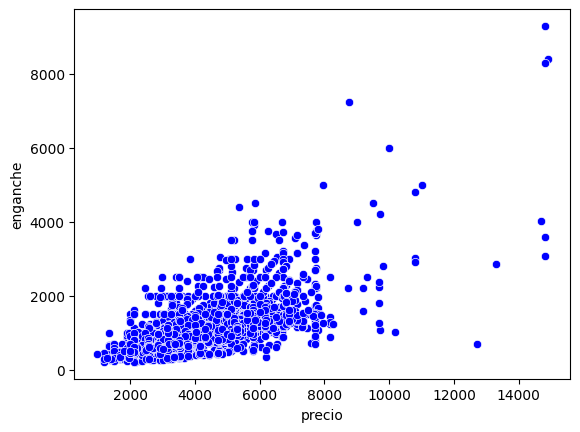

In [8]:
from turtle import color


sns.scatterplot(x='precio', y='enganche', color="blue", data=Credi)


<Axes: xlabel='precio', ylabel='monto_financiado'>

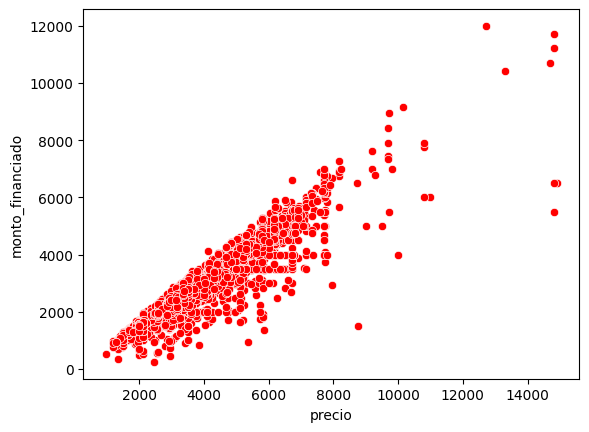

In [16]:
sns.scatterplot(x='precio', y='monto_financiado', color="red", data=Credi)

<Axes: xlabel='costo_total', ylabel='precio'>

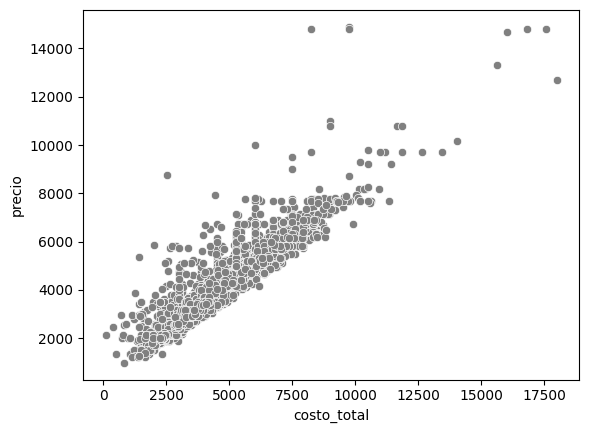

In [10]:
sns.scatterplot(x='costo_total', y='precio', color="gray", data=Credi)

<Axes: xlabel='costo_total', ylabel='monto_financiado'>

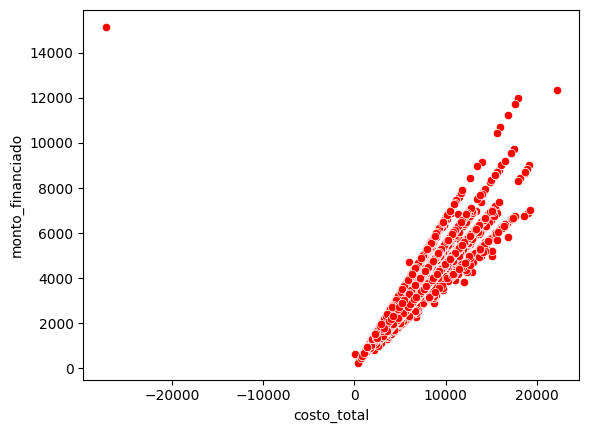

In [109]:
sns.scatterplot(x='costo_total', y='monto_financiado', color="red", data=Credi)

<Axes: xlabel='precio', ylabel='semana'>

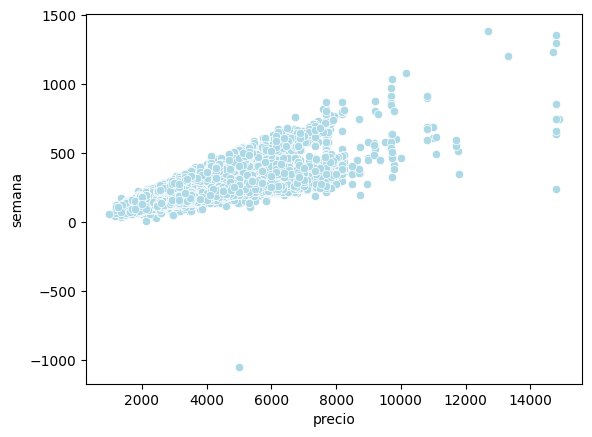

In [110]:
sns.scatterplot(x='precio', y='semana', color="lightblue", data=Credi)

<Axes: xlabel='precio', ylabel='pagos_realizados'>

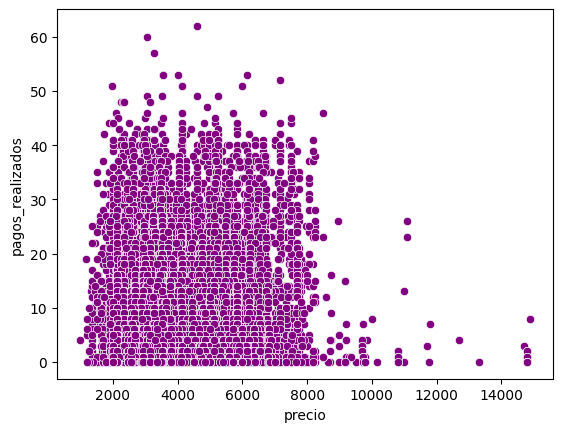

In [111]:
sns.scatterplot(x='precio', y='pagos_realizados', color="purple", data=Credi)

Evaluamos las gráficas que se pudieron obtener de las variables en relación con precio como letra y. Consiguiente buscamos las correlaciones presentes en las vairbales.

In [112]:
nn=Credi[['precio','enganche','monto_financiado','pagos_realizados', 'costo_total','semana']]
Corr_Factors=nn.corr()
Corr_Factors

Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,precio,enganche,monto_financiado,pagos_realizados,costo_total,semana
precio,1.000000,0.696202,0.951223,0.017000,0.872403,0.672673
enganche,0.696202,1.000000,0.461664,0.082001,0.377282,0.360118
monto_financiado,0.951223,0.461664,1.000000,0.051495,0.916193,0.674962
pagos_realizados,0.017000,0.082001,0.051495,1.000000,0.132380,0.133589
costo_total,0.872403,0.377282,0.916193,0.132380,1.000000,0.411911
semana,0.672673,0.360118,0.674962,0.133589,0.411911,1.000000


En el siguiente gráfico de correlaciones podemos observar que las variables que nos pueden servir y que más relación tienen en el modelo son precio, monto financiado y costo total.

<Axes: >

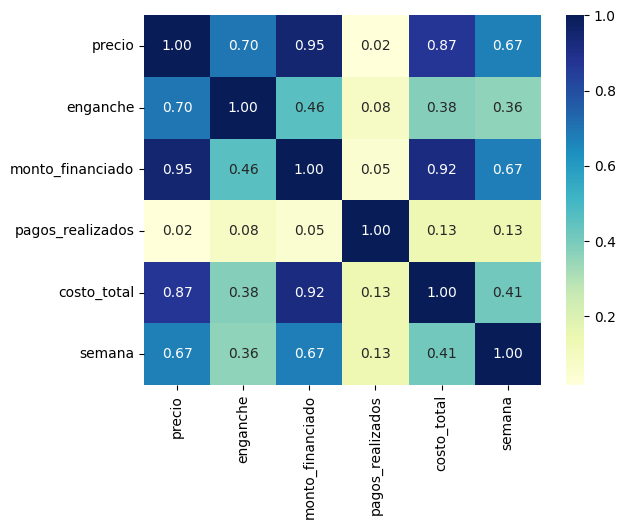

In [113]:

Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

Del primer análisis tenemos un modelo, filtrado por plazos de 13 semanas, que funciona mejor con precio como variable dependiente y monto financiado y costo total como variables independientes, de esta forma obtuvimos un modelos con coeficiente de determinación de 0.904 que nos dice que es un modelo bastante bueno con fuerza y estabilidad.

In [63]:
#Modelo1
Vars_Indep= Credi[['monto_financiado', 'costo_total']]
Var_Dep= Credi['precio']

In [64]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [65]:
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [66]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado', 'costo_total'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.64296778, 0.37636571]),
 'rank_': 2,
 'singular_': array([152366.5606819 ,   3505.22639387]),
 'intercept_': 326.19444073050045}

In [67]:
y_pred= model.predict(X=nn[['monto_financiado', 'costo_total']])
y_pred
nn.insert(0, 'Predicciones', y_pred)
nn

,Predicciones,precio,enganche,monto_financiado,pagos_realizados,costo_total,semana
4,5011.853322,4299.00,1075.0,3224.00,0,6942,178
29,5332.660225,4599.00,1150.0,3449.00,11,7410,190
32,4697.476097,4299.00,1290.0,3009.00,33,6474,166
43,4993.960220,4599.00,1380.0,3219.00,0,6903,177
46,3067.299897,2699.00,810.0,1889.00,36,4056,104
...,...,...,...,...,...,...,...
22722,6437.159803,4749.00,541.0,4208.00,0,9048,232
22724,4782.660823,3799.00,726.0,3073.00,0,6591,169
22726,7407.739080,5698.86,826.0,4872.86,0,10491,284
22728,4887.667554,3499.00,354.0,3145.00,0,6747,173


<Axes: xlabel='monto_financiado', ylabel='precio'>

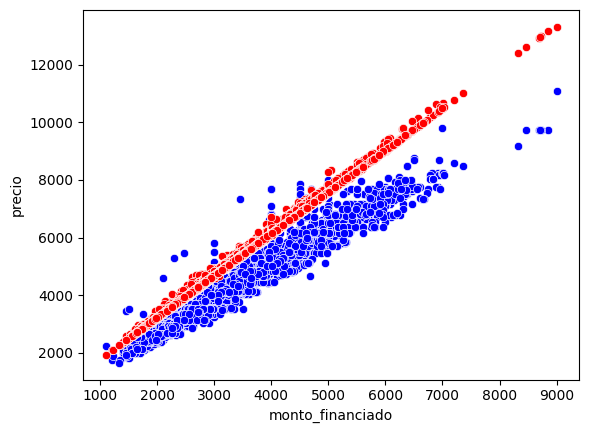

In [68]:
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=nn)
sns.scatterplot(x='monto_financiado', y='Predicciones', color="red", data=nn)
#sns.lineplot(x='monto_financiado', y='Predicciones', color="red", data=nn)

In [120]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9048310764679472

In [121]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.951226091141295

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


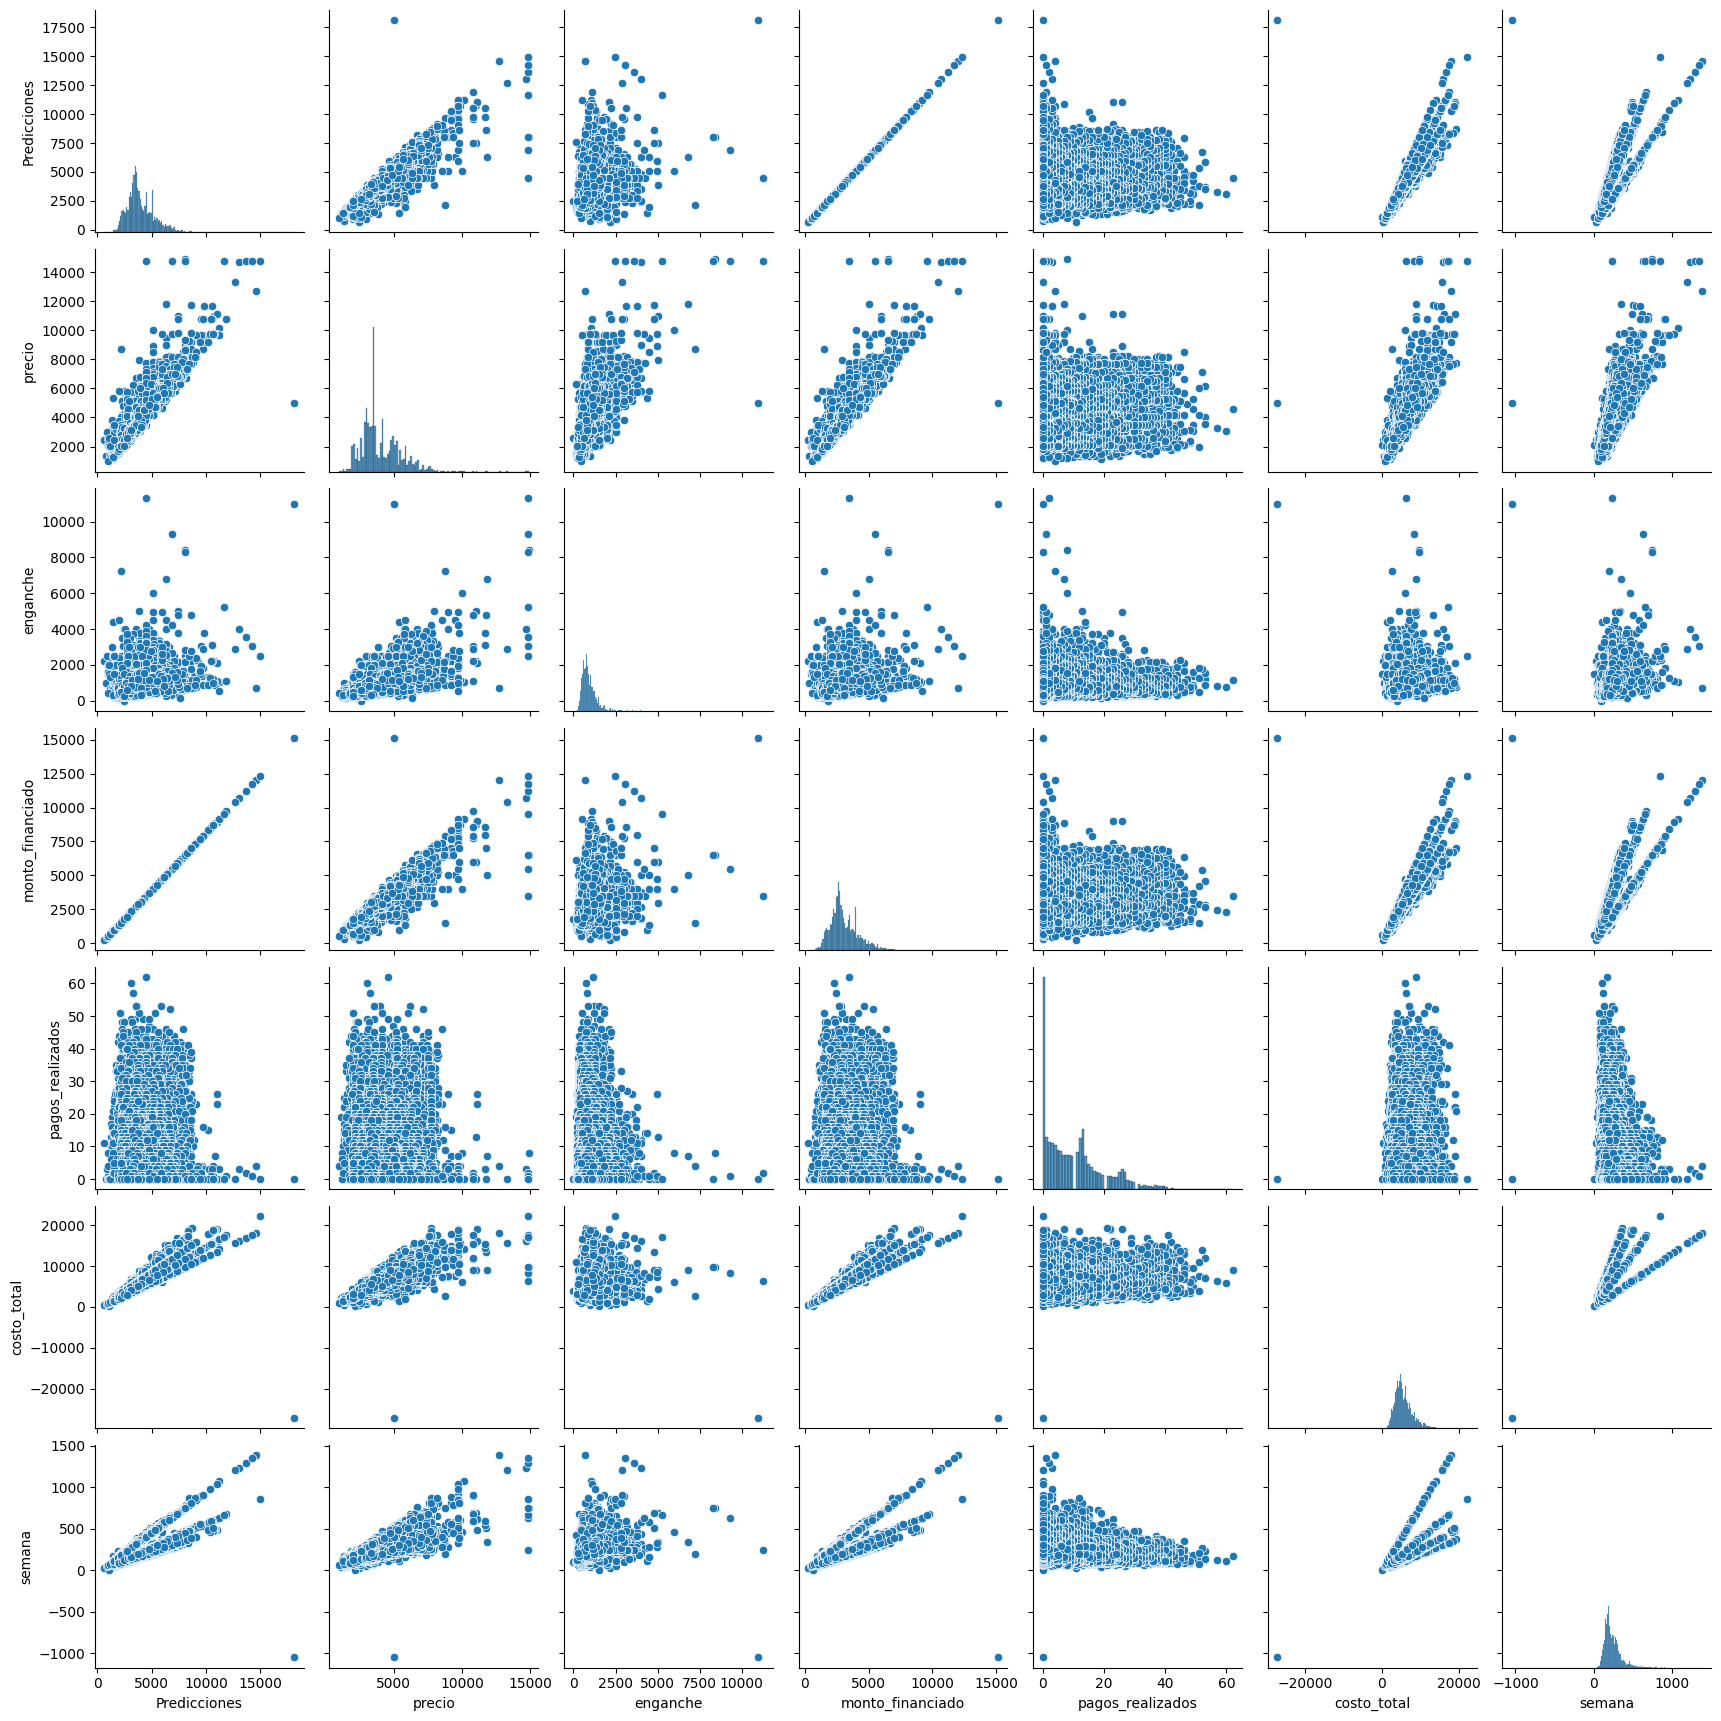

In [122]:
sns.pairplot(nn)

In [69]:
palabra_clave1= '26S'
Credi1 = Cred[Cred['plazo'].str.contains(palabra_clave1, case=False)]
Credi1[['plazo']]

,plazo
0,26S
5,26S
6,26S
8,26S
9,26S
...,...
22729,26S
22730,26S
22731,26S
22732,26S


<Axes: >

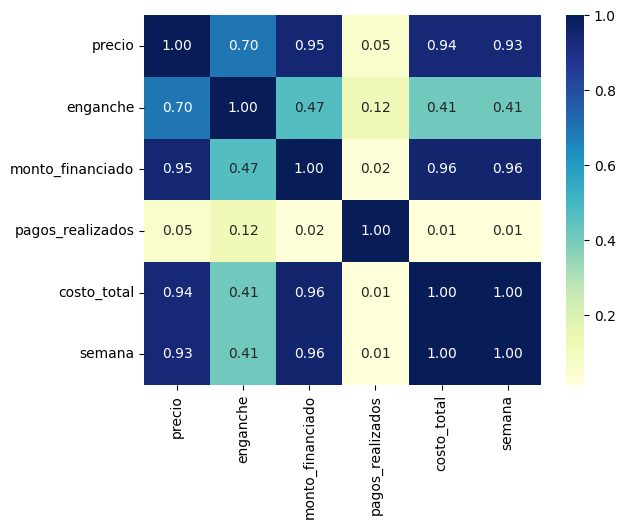

In [21]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

En nuestro segundo modelo se hace un filtrado por plazos de 26 semanas, en este modelo utilizamos la misma organización en las variables y en este caso, el modelo arrojo un coeficiente de determinación cerca de 0.696 queriendonos decir que es un modelo menos fuerte y estable que el primero. 

In [71]:
#Modelo1
Vars_Indep1= nn2[['monto_financiado', 'costo_total']]
Var_Dep1= nn2['precio']

In [72]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()

In [73]:
type(model)
model1.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [74]:
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado', 'costo_total'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([1.1785344 , 0.00319357]),
 'rank_': 2,
 'singular_': array([391007.82919313,  60761.16357404]),
 'intercept_': 351.9307051856076}

In [75]:
coef_Deter=model.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter

0.6967903702024918

In [76]:
y_pred= model.predict(X=nn2[['monto_financiado', 'costo_total']])
y_pred
nn2.insert(0, 'Predicciones', y_pred)
nn2

,Predicciones,Unnamed: 0,folio,folio_solicitud,semana,costo_total,status,fraude,inversion,pagos_realizados,...,agente_venta,dis_venta,empresa,status_cuenta,razones_buro,semana_actual,codigo_postal,fecha,fecha_ultimo_pago,fecha_pago_proximo
0,1870.449961,0,3,30,81,2106,2,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,0,12/11/21 19:00,desconocido,desconocido
1,2680.208348,1,4,33,225,2925,2,0,0,0,...,Alvaro Rafael Pascual,mic015,microtec,No determinado,0,0,0,12/11/21 19:15,desconocido,desconocido
2,2102.482330,2,5,37,170,2210,3,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,No identificable,13/11/21 14:13,desconocido,desconocido
3,2102.482330,3,6,38,170,2210,2,0,0,0,...,Luz Aylin Hernandez Lopez1,mic0748,microtec,No determinado,0,0,0,13/11/21 15:45,desconocido,desconocido
4,5011.853322,4,7,44,178,6942,1,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,Mora,Desconocido,Faltante,74,13/11/21 16:10,05/03/22 0:00,12/03/22 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,4353.274392,22730,22967,96502,211,5486,1,0,0,0,...,Mildred Asuncion Arguello Caamal,svc044,servicel,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:45,18/04/23 18:45,25/04/23 0:00
22731,4142.115986,22731,22968,96479,200,5200,1,0,0,0,...,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:46,18/04/23 18:46,25/04/23 0:00
22732,5208.336491,22732,22969,96442,256,6656,1,0,0,0,...,Nicol·s JimÈnez S·nchez,gph008,Desconocido,No determinado,0,"K0,D7,F7,D8",0,18/04/23 18:47,18/04/23 18:47,25/04/23 0:00
22733,10492.778298,22733,22970,96536,386,15054,1,0,0,0,...,Maribel Ulibarri Medina,gph014,grupoph,No determinado,0,"J0,G1,E0,E2",0,18/04/23 18:49,18/04/23 18:49,25/04/23 0:00


<Axes: xlabel='monto_financiado', ylabel='precio'>

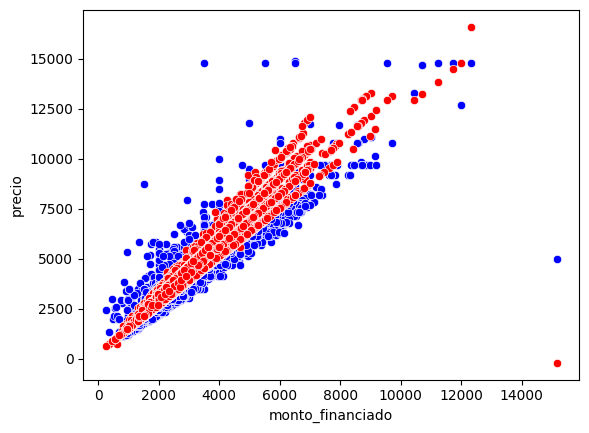

In [78]:
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=nn2)
sns.scatterplot(x='monto_financiado', y='Predicciones', color="red", data=nn2)
#sns.lineplot(x='monto_financiado', y='Predicciones', color="red", data=nn)

Como tercer modelo, seleccionado por plazos de 39 semanas, tenemos la misma organizción que los modelos anteriores, dado que precio es la variable que tiene mejor correlación con  las dos más seleccionadas, obtenemos un modelo con coficiente de dterminación de 0.942, siendo un modelo fuerte y estable en sus predicciones.

In [79]:
palabra_clave= '39S'
Cred2= Cred[Cred['plazo'].str.contains(palabra_clave, case=False)]

In [80]:
Vars_Indep2= Cred2[['monto_financiado', 'costo_total']]
Var_Dep2= Cred2['precio']

In [81]:
nn=Cred2[['precio','enganche','monto_financiado','pagos_realizados', 'costo_total','semana']]
Corr_Factors=nn.corr()
Corr_Factors

Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,precio,enganche,monto_financiado,pagos_realizados,costo_total,semana
precio,1.000000,0.736731,0.970458,0.012687,0.969560,0.969314
enganche,0.736731,1.000000,0.554017,0.104008,0.559546,0.559064
monto_financiado,0.970458,0.554017,1.000000,0.016281,0.996716,0.996620
pagos_realizados,0.012687,0.104008,0.016281,1.000000,0.016615,0.015094
costo_total,0.969560,0.559546,0.996716,0.016615,1.000000,0.999858
semana,0.969314,0.559064,0.996620,0.015094,0.999858,1.000000


In [82]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [83]:
type(model)
model2.fit(X=Vars_Indep2, y=Var_Dep2)


LinearRegression()

In [84]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado', 'costo_total'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.76628281, 0.19898173]),
 'rank_': 2,
 'singular_': array([192136.0976941 ,   5938.51290495]),
 'intercept_': 241.33493715746772}

In [85]:
coef_Deter=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter

0.942587765279475

In [86]:
y_pred= model2.predict(X=nn3[['monto_financiado', 'costo_total']])
y_pred
nn3.insert(0, 'Predicciones', y_pred)
nn3

,Predicciones,Unnamed: 0,folio,folio_solicitud,semana,costo_total,status,fraude,inversion,pagos_realizados,...,agente_venta,dis_venta,empresa,status_cuenta,razones_buro,semana_actual,codigo_postal,fecha,fecha_ultimo_pago,fecha_pago_proximo
0,1556.175075,0,3,30,81,2106,2,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,0,12/11/21 19:00,desconocido,desconocido
1,2316.841707,1,4,33,225,2925,2,0,0,0,...,Alvaro Rafael Pascual,mic015,microtec,No determinado,0,0,0,12/11/21 19:15,desconocido,desconocido
2,1806.754018,2,5,37,170,2210,3,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,No identificable,13/11/21 14:13,desconocido,desconocido
3,1806.754018,3,6,38,170,2210,2,0,0,0,...,Luz Aylin Hernandez Lopez1,mic0748,microtec,No determinado,0,0,0,13/11/21 15:45,desconocido,desconocido
4,4093.161916,4,7,44,178,6942,1,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,Mora,Desconocido,Faltante,74,13/11/21 16:10,05/03/22 0:00,12/03/22 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3671.643868,22730,22967,96502,211,5486,1,0,0,0,...,Mildred Asuncion Arguello Caamal,svc044,servicel,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:45,18/04/23 18:45,25/04/23 0:00
22731,3491.363559,22731,22968,96479,200,5200,1,0,0,0,...,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:46,18/04/23 18:46,25/04/23 0:00
22732,4398.704909,22732,22969,96442,256,6656,1,0,0,0,...,Nicol·s JimÈnez S·nchez,gph008,Desconocido,No determinado,0,"K0,D7,F7,D8",0,18/04/23 18:47,18/04/23 18:47,25/04/23 0:00
22733,8600.785635,22733,22970,96536,386,15054,1,0,0,0,...,Maribel Ulibarri Medina,gph014,grupoph,No determinado,0,"J0,G1,E0,E2",0,18/04/23 18:49,18/04/23 18:49,25/04/23 0:00


<Axes: xlabel='monto_financiado', ylabel='precio'>

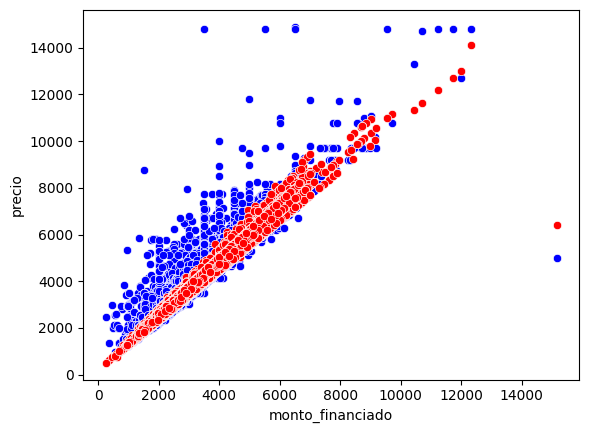

In [87]:
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=nn3)
sns.scatterplot(x='monto_financiado', y='Predicciones', color="red", data=nn3)
#sns.lineplot(x='monto_financiado', y='Predicciones', color="red", data=nn)

Como cuarto modelo, seleccionado por plazos de 52 semanas, tenemos la misma organizción que los modelos anteriores y se  obtiene un modelo con coficiente de dterminación de 0.952, siendo un modelo fuerte y estable en sus predicciones.

In [55]:
palabra_clave= '52S'
Cred3= Cred[Cred['plazo'].str.contains(palabra_clave, case=False)]

In [56]:
Vars_Indep3= Cred3[['monto_financiado', 'costo_total']]
Var_Dep3= Cred3['precio']

In [57]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [91]:
type(model)
model3.fit(X=Vars_Indep3, y=Var_Dep3)


LinearRegression()

In [92]:
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado', 'costo_total'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 1.29947114, -0.04140885]),
 'rank_': 2,
 'singular_': array([82522.20493404,  2094.58405328]),
 'intercept_': 263.95744159516744}

In [93]:
coef_Deter=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter

0.9526377719566786

In [89]:
y_pred= model3.predict(X=nn3[['monto_financiado', 'costo_total']])
y_pred
nn4.insert(0, 'Predicciones', y_pred)
nn4

,Predicciones,Unnamed: 0,folio,folio_solicitud,semana,costo_total,status,fraude,inversion,pagos_realizados,...,agente_venta,dis_venta,empresa,status_cuenta,razones_buro,semana_actual,codigo_postal,fecha,fecha_ultimo_pago,fecha_pago_proximo
0,1556.175075,0,3,30,81,2106,2,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,0,12/11/21 19:00,desconocido,desconocido
1,2316.841707,1,4,33,225,2925,2,0,0,0,...,Alvaro Rafael Pascual,mic015,microtec,No determinado,0,0,0,12/11/21 19:15,desconocido,desconocido
2,1806.754018,2,5,37,170,2210,3,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,No identificable,13/11/21 14:13,desconocido,desconocido
3,1806.754018,3,6,38,170,2210,2,0,0,0,...,Luz Aylin Hernandez Lopez1,mic0748,microtec,No determinado,0,0,0,13/11/21 15:45,desconocido,desconocido
4,4093.161916,4,7,44,178,6942,1,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,Mora,Desconocido,Faltante,74,13/11/21 16:10,05/03/22 0:00,12/03/22 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3671.643868,22730,22967,96502,211,5486,1,0,0,0,...,Mildred Asuncion Arguello Caamal,svc044,servicel,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:45,18/04/23 18:45,25/04/23 0:00
22731,3491.363559,22731,22968,96479,200,5200,1,0,0,0,...,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:46,18/04/23 18:46,25/04/23 0:00
22732,4398.704909,22732,22969,96442,256,6656,1,0,0,0,...,Nicol·s JimÈnez S·nchez,gph008,Desconocido,No determinado,0,"K0,D7,F7,D8",0,18/04/23 18:47,18/04/23 18:47,25/04/23 0:00
22733,8600.785635,22733,22970,96536,386,15054,1,0,0,0,...,Maribel Ulibarri Medina,gph014,grupoph,No determinado,0,"J0,G1,E0,E2",0,18/04/23 18:49,18/04/23 18:49,25/04/23 0:00


<Axes: xlabel='monto_financiado', ylabel='precio'>

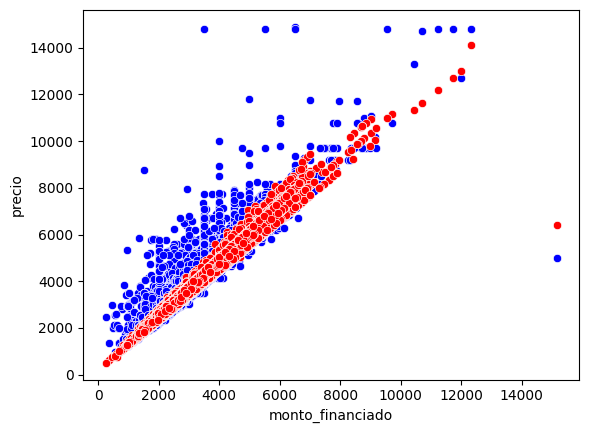

In [90]:
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=nn4)
sns.scatterplot(x='monto_financiado', y='Predicciones', color="red", data=nn4)
#sns.lineplot(x='monto_financiado', y='Predicciones', color="red", data=nn)

Como conclusión general podemos observar que los modelos más estables van del de 52 plazos y 39 plazos al de 13 plazos, finalizando con el de 26 plazos; es decir, tenemos una fuerte dependencia del precio en el caso del plazo de 52 semanas y 39 semanas, dandonos una predicción futura certera del modelo explicado, mientras que en las variables que vieron plazos de 26 semanas tenemos otros factores que afectan el precio del producto. 